In [365]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [366]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [367]:
# This dataset was created by combining different datasets already available
# independently but not combined before. In this dataset, 5 heart datasets
# are combined over 11 common features which makes it the largest heart
# disease dataset available so far for research purposes. The five datasets
# used for its curation are:

# Cleveland: 303 observations
# Hungarian: 294 observations
# Switzerland: 123 observations
# Long Beach VA: 200 observations
# Stalog (Heart) Data Set: 270 observations
# Total: 1190 observations
# Duplicated: 272 observations
# Final dataset: 918 observations


#Attribute Information

# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

In [368]:
num_col = df.select_dtypes(include=['number']).columns.tolist()

# Remove the target column if present
if "HeartDisease" in num_col:
    num_col.remove("HeartDisease")

# Generate summary statistics for numeric columns
numeric_summary = df[num_col].describe()

print(numeric_summary)

         Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
count 918.00     918.00       918.00     918.00 918.00   918.00
mean   53.51     132.40       198.80       0.23 136.81     0.89
std     9.43      18.51       109.38       0.42  25.46     1.07
min    28.00       0.00         0.00       0.00  60.00    -2.60
25%    47.00     120.00       173.25       0.00 120.00     0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60
75%    60.00     140.00       267.00       0.00 156.00     1.50
max    77.00     200.00       603.00       1.00 202.00     6.20


In [369]:

columns_to_modify = ['Cholesterol', 'RestingBP']
for column_name in columns_to_modify:
    zero_indices = df.index[df[column_name] == 0]
    non_zero_values = df[column_name][df[column_name] != 0]
    avg = np.mean(non_zero_values)
    df.loc[zero_indices, column_name] = avg

print("Modified DataFrame:")
print(df)

Modified DataFrame:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA     140.00       289.00          0     Normal   
1     49   F           NAP     160.00       180.00          0     Normal   
2     37   M           ATA     130.00       283.00          0         ST   
3     48   F           ASY     138.00       214.00          0     Normal   
4     54   M           NAP     150.00       195.00          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA     110.00       264.00          0     Normal   
914   68   M           ASY     144.00       193.00          1     Normal   
915   57   M           ASY     130.00       131.00          0     Normal   
916   57   F           ATA     130.00       236.00          0        LVH   
917   38   M           NAP     138.00       175.00          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      

In [370]:
numeric_summary = df[num_col].describe()

print(numeric_summary)

         Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
count 918.00     918.00       918.00     918.00 918.00   918.00
mean   53.51     132.54       244.64       0.23 136.81     0.89
std     9.43      17.99        53.32       0.42  25.46     1.07
min    28.00      80.00        85.00       0.00  60.00    -2.60
25%    47.00     120.00       214.00       0.00 120.00     0.00
50%    54.00     130.00       244.64       0.00 138.00     0.60
75%    60.00     140.00       267.00       0.00 156.00     1.50
max    77.00     200.00       603.00       1.00 202.00     6.20


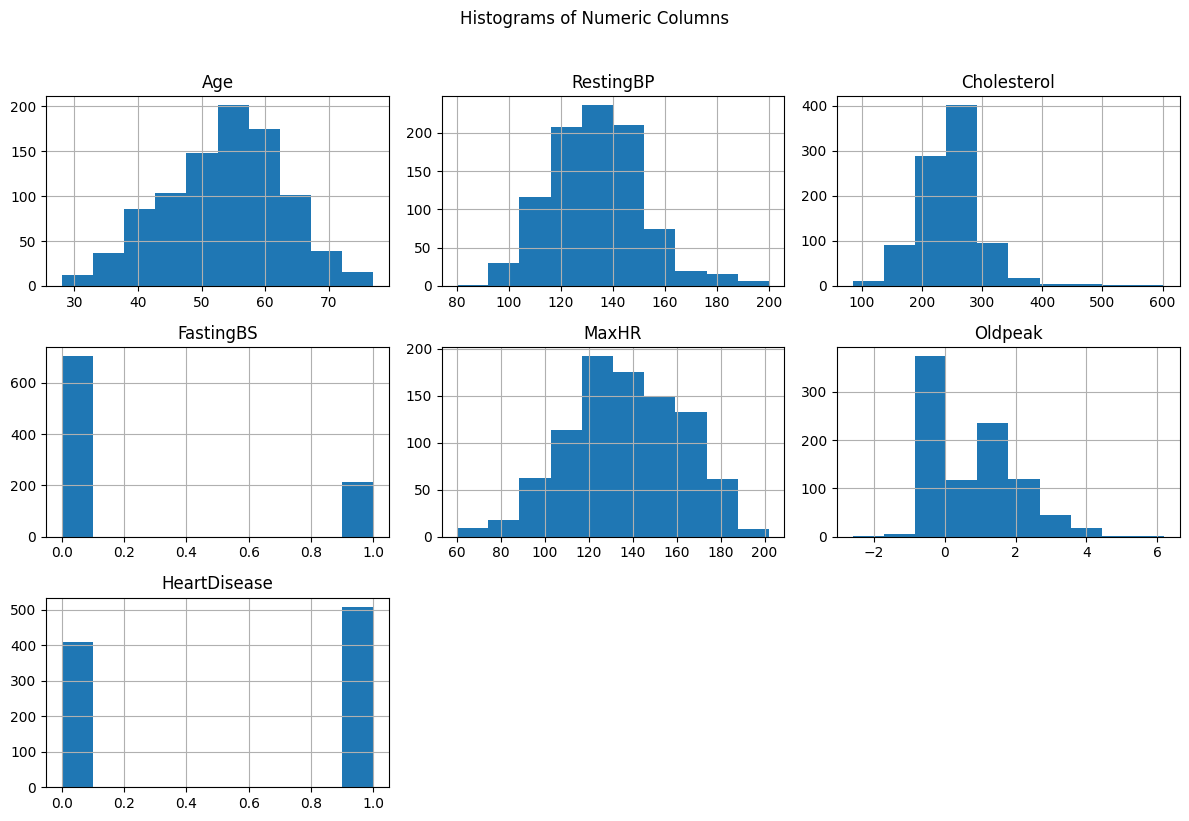

In [371]:
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

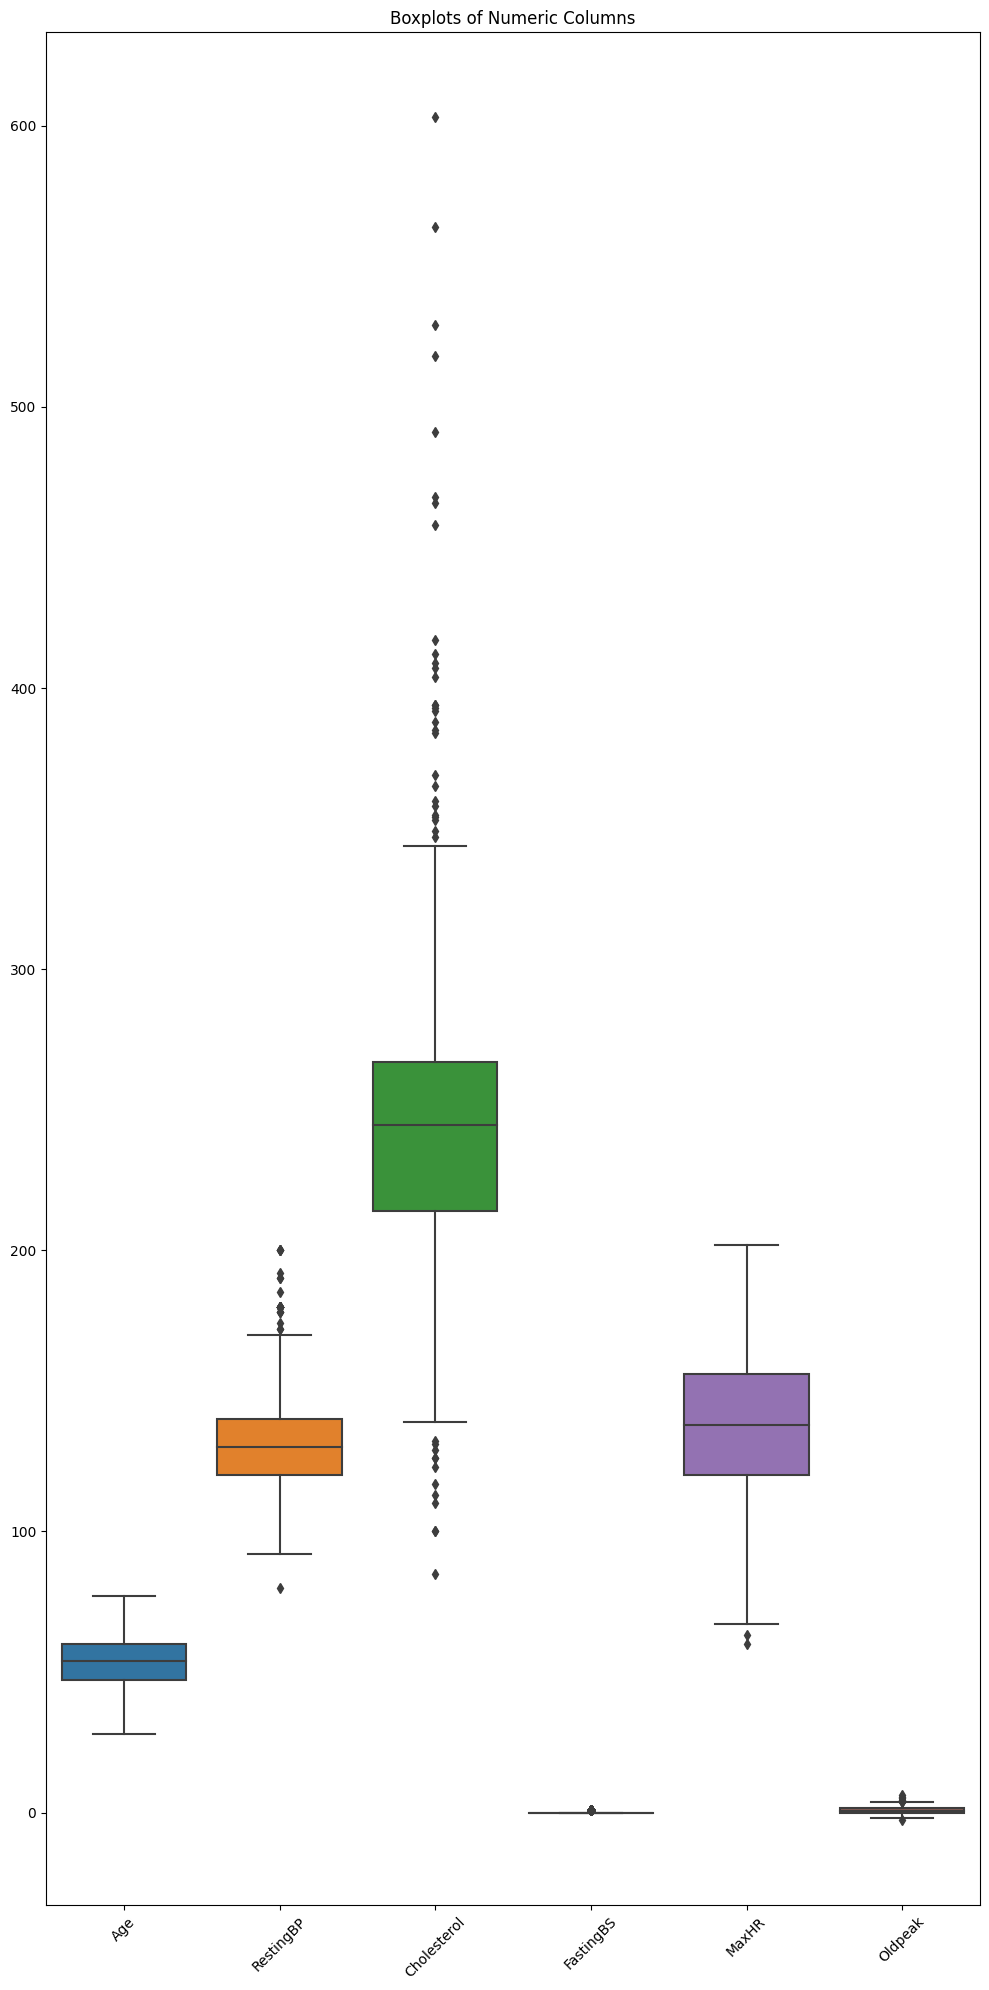

In [372]:
numeric_cols = df.select_dtypes(include='number').drop(columns=['HeartDisease'])
plt.figure(figsize=(10, 20))
sns.boxplot(data=numeric_cols)
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

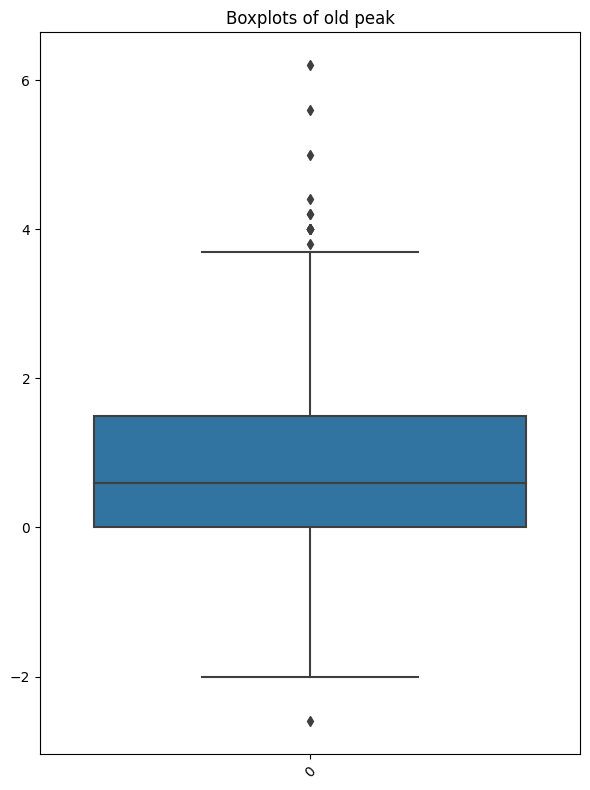

In [373]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['Oldpeak'])
plt.title("Boxplots of old peak")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


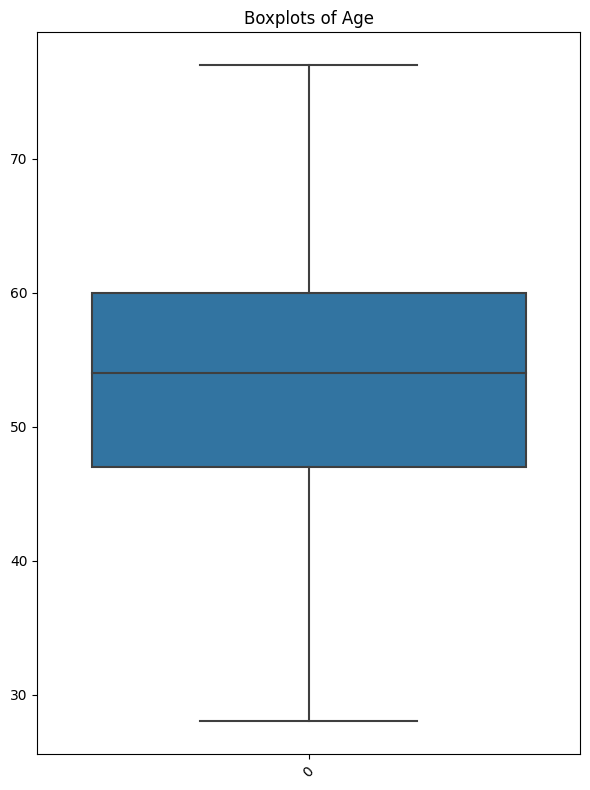

In [374]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['Age'])
plt.title("Boxplots of Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

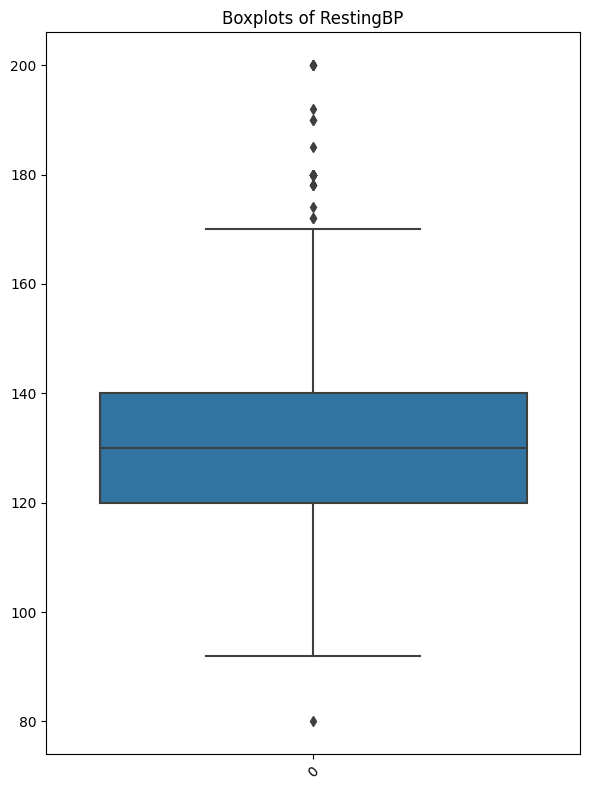

In [375]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['RestingBP'])
plt.title("Boxplots of RestingBP")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


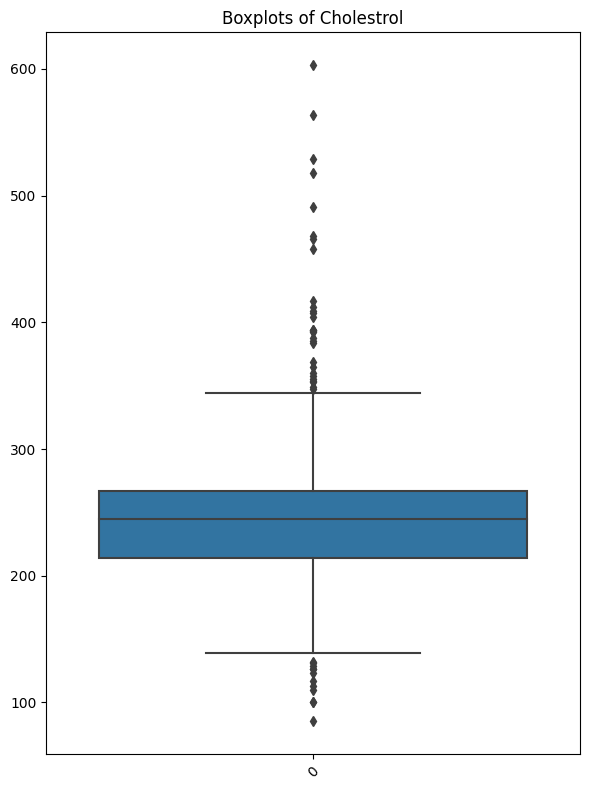

In [376]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['Cholesterol'])
plt.title("Boxplots of Cholestrol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

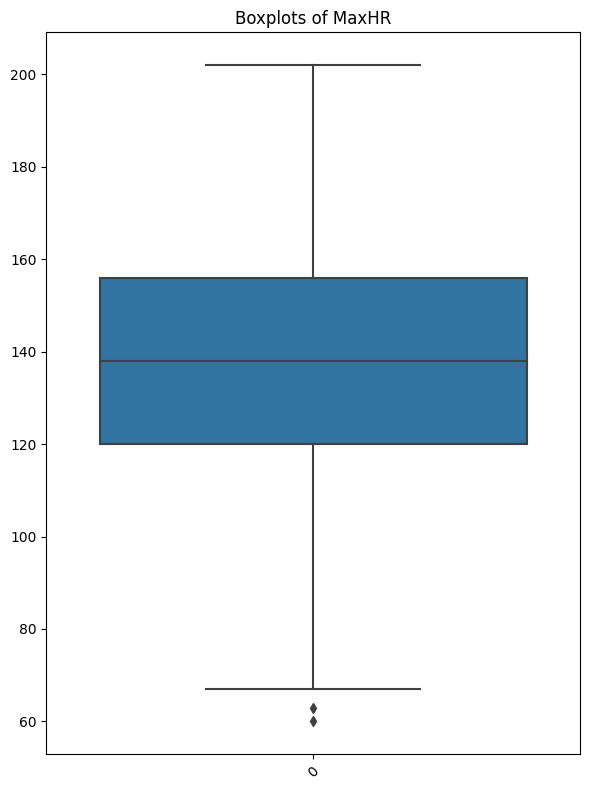

In [377]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['MaxHR'])
plt.title("Boxplots of MaxHR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [378]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [379]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                float64
Cholesterol              float64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [380]:

correlation_matrix = df[num_col + ["HeartDisease"]].corr()
fig = px.imshow(correlation_matrix,
                labels=dict(x="Columns", y="Columns"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale="Viridis",
                title="Correlation Plot of the Heart Failure Prediction")

fig.show()

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), string(5)
memory usage: 86.2 KB


In [382]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [383]:
from scipy import stats

trim_proportion = 0.1


for column_name in df[num_col].columns:
    column_data = df[column_name]

    trimmed_mean = stats.trim_mean(
        column_data, proportiontocut=trim_proportion)

    sorted_data = np.sort(column_data)
    n = len(sorted_data)
    trimmed_count = int(n * trim_proportion)
    trimmed_data = sorted_data[trimmed_count:n - trimmed_count]
    trimmed_median = np.median(trimmed_data)

    # Print the results for each column
    print("Column:", column_name)
    print("Trimmed Mean (X¯T):", trimmed_mean)
    print("Trimmed Median (M¯T):", trimmed_median)
    print()

Column: Age
Trimmed Mean (X¯T): 53.71059782608695
Trimmed Median (M¯T): 54.0

Column: RestingBP
Trimmed Mean (X¯T): 131.5319849106254
Trimmed Median (M¯T): 130.0

Column: Cholesterol
Trimmed Mean (X¯T): 241.5574549772701
Trimmed Median (M¯T): 244.6353887399464

Column: FastingBS
Trimmed Mean (X¯T): 0.1671195652173913
Trimmed Median (M¯T): 0.0

Column: MaxHR
Trimmed Mean (X¯T): 137.23097826086956
Trimmed Median (M¯T): 138.0

Column: Oldpeak
Trimmed Mean (X¯T): 0.7376358695652173
Trimmed Median (M¯T): 0.6



In [384]:
df[num_col].skew()

Age           -0.20
RestingBP      0.61
Cholesterol    1.37
FastingBS      1.26
MaxHR         -0.14
Oldpeak        1.02
dtype: float64

In [385]:

numerical_col = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']]
for col in numerical_col:

    if df[col].skew() > 0.55:

        df[col] = np.log1p(numerical_col[col])

In [386]:
from scipy.stats import yeojohnson
transformed_data, _ = yeojohnson(df['Oldpeak'].values.reshape(-1, 1))
df['Oldpeak'] =transformed_data

In [387]:
df[num_col].skew()

Age           -0.20
RestingBP      0.15
Cholesterol   -0.17
FastingBS      1.26
MaxHR         -0.14
Oldpeak       -0.30
dtype: float64

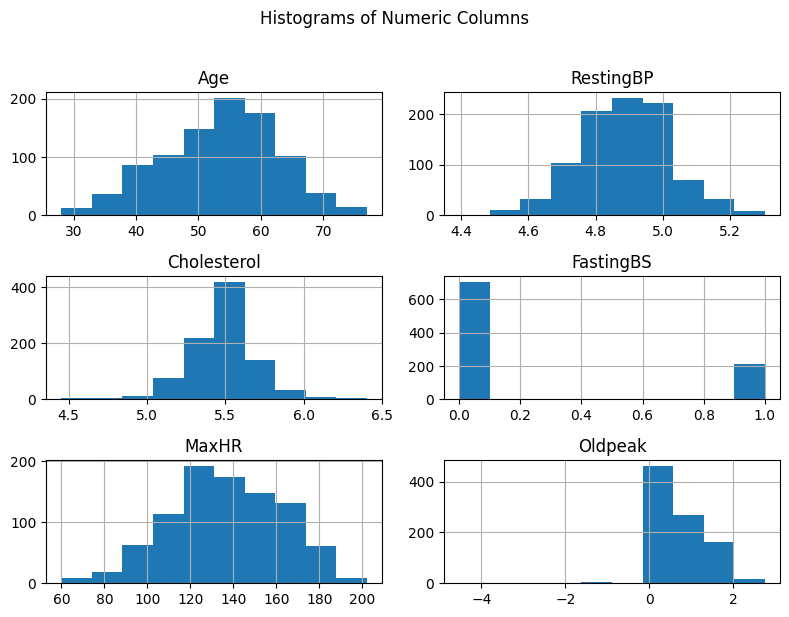

In [432]:
df[num_col].hist(figsize=(8, 6))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

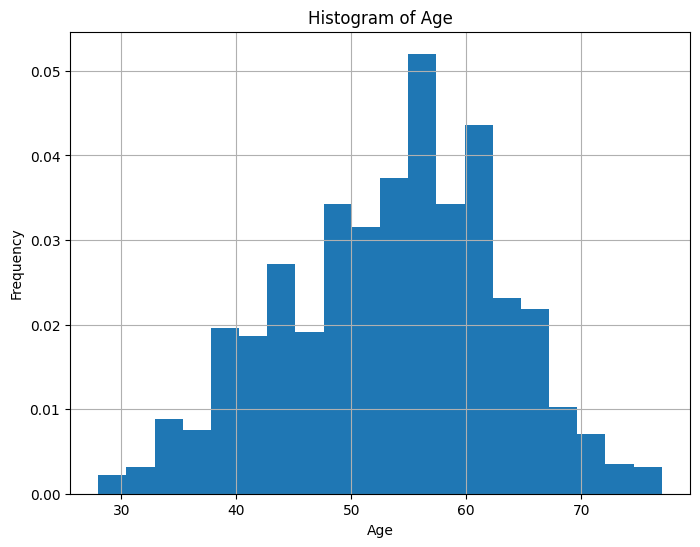

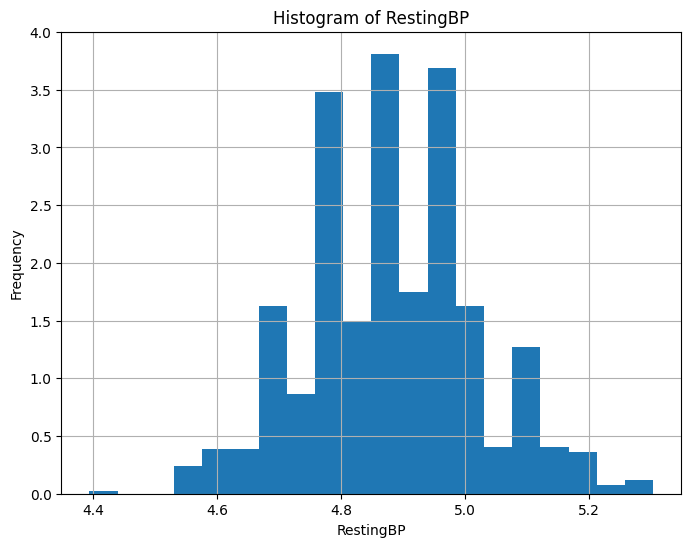

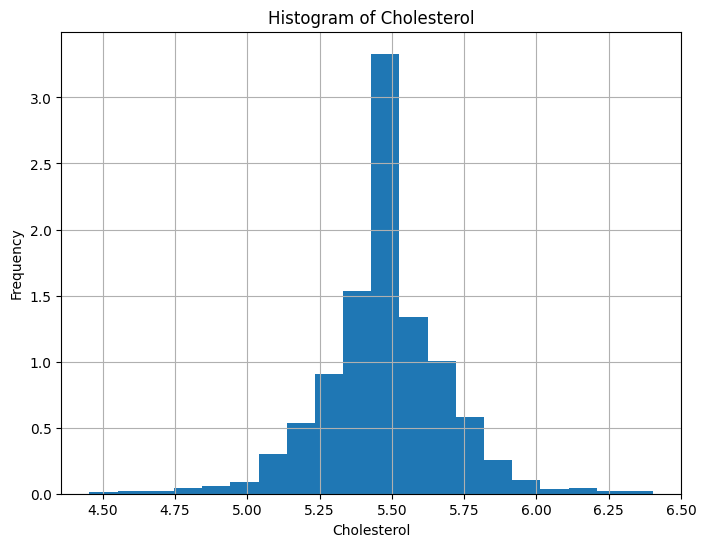

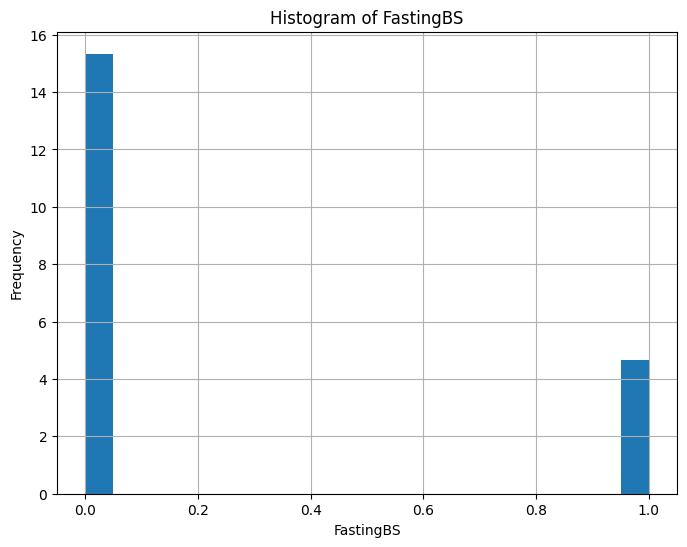

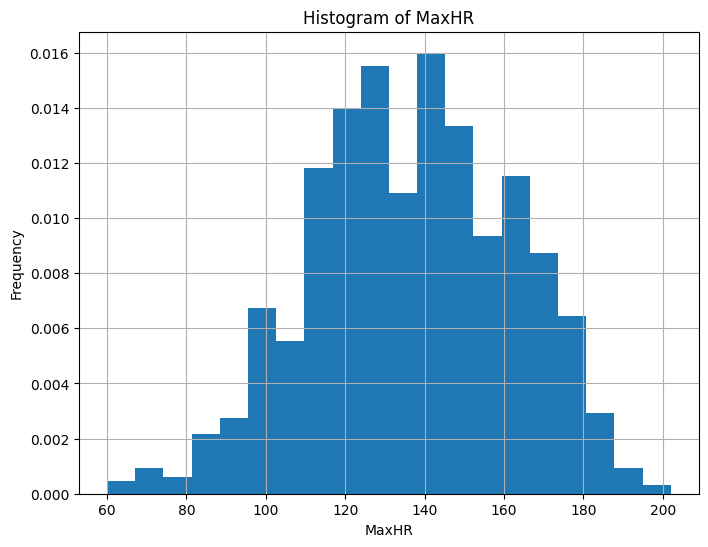

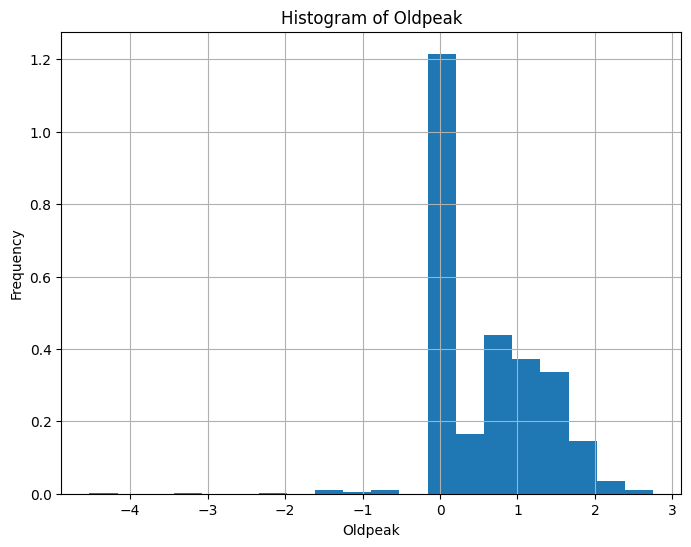

In [389]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    df[col].plot(kind='hist', density=True, bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [390]:
z_scores = np.abs(stats.zscore(df['Cholesterol']))
threshold = 3
cleaned_data = df[z_scores < threshold].copy()
print(cleaned_data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA       4.95         5.67          0     Normal   
1     49   F           NAP       5.08         5.20          0     Normal   
2     37   M           ATA       4.88         5.65          0         ST   
3     48   F           ASY       4.93         5.37          0     Normal   
4     54   M           NAP       5.02         5.28          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA       4.71         5.58          0     Normal   
914   68   M           ASY       4.98         5.27          1     Normal   
915   57   M           ASY       4.88         4.88          0     Normal   
916   57   F           ATA       4.88         5.47          0        LVH   
917   38   M           NAP       4.93         5.17          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [391]:
string_col_ = cleaned_data.select_dtypes(include="string").columns

for col in string_col_:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(cleaned_data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    710
F    191
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    485
NAP    199
ATA    171
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    538
LVH       185
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    536
Y    365
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    449
Up      391
Down     61
Name: count, dtype: Int64


In [392]:
## Creaeting one hot encoded features for working with non tree based algorithms 

df_nontree=pd.get_dummies(cleaned_data,columns=string_col_,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,4.95,5.67,0,172,0.00,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,5.08,5.20,0,156,0.78,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,4.88,5.65,0,98,0.00,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,4.93,5.37,0,108,1.06,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,5.02,5.28,0,122,0.00,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [393]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,cleaned_data[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,4.95,5.67,0,172,0.00,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,5.08,5.20,0,156,0.78,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,4.88,5.65,0,98,0.00,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,4.93,5.37,0,108,1.06,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,5.02,5.28,0,122,0.00,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


In [394]:
## Creaeting one hot encoded features for working with tree based algorithms 
from sklearn.preprocessing import LabelEncoder
df_tree = cleaned_data.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,39,140,0,1,97,0,10,2,0
1,21,0,2,53,32,0,1,81,0,20,1,1
2,9,1,1,28,134,0,2,24,0,10,2,0
3,20,0,0,37,64,0,1,33,1,25,1,1
4,26,1,2,47,45,0,1,47,0,10,2,0


## Non tree based

In [395]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_nontree[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]] = sc.fit_transform(df_nontree[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]])
df_nontree

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.44,0.47,1.01,0,1.38,-0.85,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,-0.48,1.47,-1.54,0,0.75,0.29,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,-1.76,-0.08,0.90,0,-1.53,-0.85,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,-0.58,0.36,-0.61,0,-1.13,0.71,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,0.06,0.99,-1.11,0,-0.59,-0.85,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.90,-1.34,0.53,0,-0.19,0.46,False,True,False,False,...,True,False,True,False,True,False,False,True,False,1
914,1.55,0.68,-1.16,1,0.16,1.92,False,True,True,False,...,False,False,True,False,True,False,False,True,False,1
915,0.38,-0.08,-3.24,0,-0.86,0.46,False,True,True,False,...,False,False,True,False,False,True,False,True,False,1
916,0.38,-0.08,-0.08,0,1.45,-0.85,True,False,False,True,...,False,True,False,False,True,False,False,True,False,1


In [396]:

X = df_nontree.iloc[:, :-1].values
y = df_nontree.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_7030, X_test_7030, y_train_7030, y_test_7030 = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train_6040, X_test_6040, y_train_6040, y_test_6040 = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train_5050, X_test_5050, y_train_5050, y_test_5050 = train_test_split(X, y, test_size = 0.5, random_state = 0)


   



## 80-20

In [397]:
subset_df = pd.DataFrame(X_train_8020)[:5]  
print(subset_df)

     0     1     2  3     4     5      6      7      8      9      10     11  \
0  0.69 -0.08  0.30  0  0.28  0.63  False   True   True  False  False  False   
1  1.33 -1.20  0.46  0  0.12  0.71  False   True   True  False  False  False   
2  0.80  3.15  0.11  1 -2.62 -0.85  False   True  False  False   True  False   
3  0.91 -0.68  0.59  0 -1.49  0.94  False   True   True  False  False  False   
4 -0.48  1.47 -1.54  0  0.75  0.29   True  False  False  False   True  False   

      12     13     14     15     16     17     18     19  
0  False   True  False  False   True  False  False   True  
1  False   True  False   True  False  False  False   True  
2  False  False   True   True  False  False   True  False  
3  False   True  False  False   True  False   True  False  
4  False   True  False   True  False  False   True  False  


## KNN Classification

In [398]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
                            roc_auc_score, cohen_kappa_score, matthews_corrcoef, \
                             log_loss
def knn_(x,y,x_test,y_test):
    classifier = KNeighborsClassifier()
    classifier.fit(x,y)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    matthews_corr = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)

    metrics_df_KNN = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

    # Display metrics table
    print(metrics_df_KNN)

In [399]:
knn_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.85
1       Precision   0.86
2          Recall   0.90
3        F1-Score   0.88
4         ROC AUC   0.84
5   Cohen's Kappa   0.69
6  Matthews Corr.   0.69
7        Log Loss   5.38


In [400]:
knn_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.88
2          Recall   0.88
3        F1-Score   0.88
4         ROC AUC   0.85
5   Cohen's Kappa   0.70
6  Matthews Corr.   0.70
7        Log Loss   5.19


In [401]:
knn_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.88
2          Recall   0.88
3        F1-Score   0.88
4         ROC AUC   0.85
5   Cohen's Kappa   0.71
6  Matthews Corr.   0.71
7        Log Loss   5.19


In [402]:
knn_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.84
1       Precision   0.84
2          Recall   0.88
3        F1-Score   0.86
4         ROC AUC   0.83
5   Cohen's Kappa   0.67
6  Matthews Corr.   0.67
7        Log Loss   5.83


## SVC

In [403]:
from sklearn.svm import SVC
def svc_(x,y,x_test,y_test):
    classifier1 = SVC(kernel = 'rbf', random_state = 0)
    classifier1.fit(x,y)
    y_pred1 = classifier1.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred1)
    precision = precision_score(y_test, y_pred1)
    recall = recall_score(y_test, y_pred1)
    f1 = f1_score(y_test, y_pred1)
    roc_auc = roc_auc_score(y_test, y_pred1)
    cohen_kappa = cohen_kappa_score(y_test, y_pred1)
    matthews_corr = matthews_corrcoef(y_test, y_pred1)
    logloss = log_loss(y_test, y_pred1)

    metrics_df_SVM = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

    # Display metrics table
    print(metrics_df_SVM)

In [404]:
svc_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.85
2          Recall   0.92
3        F1-Score   0.88
4         ROC AUC   0.84
5   Cohen's Kappa   0.70
6  Matthews Corr.   0.70
7        Log Loss   5.18


In [405]:
svc_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.87
1       Precision   0.88
2          Recall   0.90
3        F1-Score   0.89
4         ROC AUC   0.86
5   Cohen's Kappa   0.72
6  Matthews Corr.   0.72
7        Log Loss   4.79


In [406]:
svc_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.88
1       Precision   0.88
2          Recall   0.91
3        F1-Score   0.90
4         ROC AUC   0.87
5   Cohen's Kappa   0.75
6  Matthews Corr.   0.75
7        Log Loss   4.39


In [407]:
svc_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.88
1       Precision   0.87
2          Recall   0.92
3        F1-Score   0.90
4         ROC AUC   0.87
5   Cohen's Kappa   0.76
6  Matthews Corr.   0.76
7        Log Loss   4.32


## Naive Bayes

In [408]:
from sklearn.naive_bayes import GaussianNB
def gb_(x,y,x_test,y_test):
    classifier2 = GaussianNB() 
    classifier2.fit(x,y)
    y_pred2 = classifier2.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred2)
    precision = precision_score(y_test, y_pred2)
    recall = recall_score(y_test, y_pred2)
    f1 = f1_score(y_test, y_pred2)
    roc_auc = roc_auc_score(y_test, y_pred2)
    cohen_kappa = cohen_kappa_score(y_test, y_pred2)
    matthews_corr = matthews_corrcoef(y_test, y_pred2)
    logloss = log_loss(y_test, y_pred2)

    metrics_df_GB = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

    # Display metrics table
    print(metrics_df_GB)

In [409]:
gb_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.83
1       Precision   0.87
2          Recall   0.85
3        F1-Score   0.86
4         ROC AUC   0.83
5   Cohen's Kappa   0.66
6  Matthews Corr.   0.66
7        Log Loss   5.97


In [410]:
gb_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.85
1       Precision   0.89
2          Recall   0.85
3        F1-Score   0.87
4         ROC AUC   0.84
5   Cohen's Kappa   0.68
6  Matthews Corr.   0.68
7        Log Loss   5.59


In [411]:
gb_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.84
1       Precision   0.87
2          Recall   0.85
3        F1-Score   0.86
4         ROC AUC   0.84
5   Cohen's Kappa   0.68
6  Matthews Corr.   0.68
7        Log Loss   5.69


In [412]:
gb_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.85
1       Precision   0.86
2          Recall   0.87
3        F1-Score   0.87
4         ROC AUC   0.85
5   Cohen's Kappa   0.70
6  Matthews Corr.   0.70
7        Log Loss   5.35


## Tree Based

In [413]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_tree[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]] = sc.fit_transform(df_tree[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]])
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.44,1,1,0.59,1.11,0,1,1.40,0,-0.87,2,0
1,-0.48,0,2,1.57,-1.46,0,1,0.76,0,0.12,1,1
2,-1.76,1,1,-0.18,0.97,0,2,-1.53,0,-0.87,2,0
3,-0.58,0,0,0.45,-0.70,0,1,-1.17,1,0.62,1,1
4,0.06,1,2,1.15,-1.15,0,1,-0.60,0,-0.87,2,0


In [414]:
X = df_tree.iloc[:, :-1].values
y = df_tree.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_7030, X_test_7030, y_train_7030, y_test_7030 = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train_6040, X_test_6040, y_train_6040, y_test_6040 = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train_5050, X_test_5050, y_train_5050, y_test_5050 = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [415]:
subset_df = pd.DataFrame(X_train_8020)[:5]  
print(subset_df)

     0    1    2     3     4    5    6     7    8     9    10
0  0.69 1.00 0.00 -0.18  0.26 0.00 1.00  0.28 1.00  0.52 2.00
1  1.33 1.00 0.00 -1.23  0.45 0.00 1.00  0.12 0.00  0.62 2.00
2  0.80 1.00 2.00  2.34  0.04 1.00 2.00 -2.37 0.00 -0.87 1.00
3  0.91 1.00 0.00 -0.81  0.59 0.00 1.00 -1.49 1.00  0.91 1.00
4 -0.48 0.00 2.00  1.57 -1.46 0.00 1.00  0.76 0.00  0.12 1.00


##  Decision Tree Classification

In [416]:
from sklearn.tree import DecisionTreeClassifier
def dtc_(x,y,x_test,y_test):
    classifier4 = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
    classifier4.fit(x , y)
    y_pred4 = classifier4.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred4)
    precision = precision_score(y_test, y_pred4)
    recall = recall_score(y_test, y_pred4)
    f1 = f1_score(y_test, y_pred4)
    roc_auc = roc_auc_score(y_test, y_pred4)
    cohen_kappa = cohen_kappa_score(y_test, y_pred4)
    matthews_corr = matthews_corrcoef(y_test, y_pred4)
    logloss = log_loss(y_test, y_pred4)

    metrics_df_DCT = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

    # Display metrics table
    print(metrics_df_DCT)

In [417]:
dtc_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.76
1       Precision   0.79
2          Recall   0.80
3        F1-Score   0.79
4         ROC AUC   0.75
5   Cohen's Kappa   0.50
6  Matthews Corr.   0.50
7        Log Loss   8.76


In [418]:
dtc_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.83
1       Precision   0.89
2          Recall   0.81
3        F1-Score   0.85
4         ROC AUC   0.83
5   Cohen's Kappa   0.65
6  Matthews Corr.   0.65
7        Log Loss   6.25


In [419]:
dtc_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.79
1       Precision   0.88
2          Recall   0.75
3        F1-Score   0.81
4         ROC AUC   0.80
5   Cohen's Kappa   0.59
6  Matthews Corr.   0.59
7        Log Loss   7.49


In [420]:
dtc_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.81
1       Precision   0.84
2          Recall   0.82
3        F1-Score   0.83
4         ROC AUC   0.81
5   Cohen's Kappa   0.62
6  Matthews Corr.   0.62
7        Log Loss   6.71


## Random Forest

In [421]:
from sklearn.ensemble import RandomForestClassifier
def rfc_(x,y,x_test,y_test):
    classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier5.fit(x, y)
    y_pred5 = classifier5.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred5)
    precision = precision_score(y_test, y_pred5)
    recall = recall_score(y_test, y_pred5)
    f1 = f1_score(y_test, y_pred5)
    roc_auc = roc_auc_score(y_test, y_pred5)
    cohen_kappa = cohen_kappa_score(y_test, y_pred5)
    matthews_corr = matthews_corrcoef(y_test, y_pred5)
    logloss = log_loss(y_test, y_pred5)

    metrics_df_RF = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

   
    print(metrics_df_RF)

In [422]:
rfc_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.89
2          Recall   0.86
3        F1-Score   0.88
4         ROC AUC   0.86
5   Cohen's Kappa   0.71
6  Matthews Corr.   0.71
7        Log Loss   5.18


In [423]:
rfc_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.85
1       Precision   0.91
2          Recall   0.83
3        F1-Score   0.87
4         ROC AUC   0.85
5   Cohen's Kappa   0.69
6  Matthews Corr.   0.70
7        Log Loss   5.45


In [424]:
rfc_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.84
1       Precision   0.88
2          Recall   0.84
3        F1-Score   0.86
4         ROC AUC   0.85
5   Cohen's Kappa   0.69
6  Matthews Corr.   0.69
7        Log Loss   5.59


In [425]:
rfc_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.87
2          Recall   0.88
3        F1-Score   0.88
4         ROC AUC   0.86
5   Cohen's Kappa   0.72
6  Matthews Corr.   0.72
7        Log Loss   5.03


## Gradient Boosting

In [426]:
from sklearn.ensemble import GradientBoostingClassifier
def gbc_(x,y,x_test,y_test):
    classifier6 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    classifier6.fit(x, y)
    y_pred6 = classifier6.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred6)
    precision = precision_score(y_test, y_pred6)
    recall = recall_score(y_test, y_pred6)
    f1 = f1_score(y_test, y_pred6)
    roc_auc = roc_auc_score(y_test, y_pred6)
    cohen_kappa = cohen_kappa_score(y_test, y_pred6)
    matthews_corr = matthews_corrcoef(y_test, y_pred6)
    logloss = log_loss(y_test, y_pred6)

    metrics_df_GB = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 
                'Cohen\'s Kappa', 'Matthews Corr.', 'Log Loss'],
        'Value': [accuracy, precision, recall, f1, roc_auc, 
                cohen_kappa, matthews_corr, logloss]
    })

    # Display metrics table
    print(metrics_df_GB)

In [427]:
gbc_(X_train_8020,y_train_8020,X_test_8020,y_test_8020)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.86
2          Recall   0.91
3        F1-Score   0.88
4         ROC AUC   0.85
5   Cohen's Kappa   0.71
6  Matthews Corr.   0.71
7        Log Loss   4.98


In [428]:
gbc_(X_train_7030,y_train_7030,X_test_7030,y_test_7030)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.88
2          Recall   0.88
3        F1-Score   0.88
4         ROC AUC   0.85
5   Cohen's Kappa   0.71
6  Matthews Corr.   0.71
7        Log Loss   5.05


In [429]:
gbc_(X_train_6040,y_train_6040,X_test_6040,y_test_6040)

           Metric  Value
0        Accuracy   0.86
1       Precision   0.89
2          Recall   0.87
3        F1-Score   0.88
4         ROC AUC   0.86
5   Cohen's Kappa   0.72
6  Matthews Corr.   0.72
7        Log Loss   4.89


In [430]:
gbc_(X_train_5050,y_train_5050,X_test_5050,y_test_5050)

           Metric  Value
0        Accuracy   0.87
1       Precision   0.88
2          Recall   0.89
3        F1-Score   0.88
4         ROC AUC   0.87
5   Cohen's Kappa   0.74
6  Matthews Corr.   0.74
7        Log Loss   4.64
